# Lecture 5c Notebook - Resampling Methods (Part 3)

### Cross-Validation

<b>Cross-validation</b> is a technique typically focused on estimating <b>error statistics</b> by dividing your dataset into training and validation/test partitions.

Error statistics are used to evaluate a model's performance. In other words, it tries to measure how good a model's predictions are.

In this notebook, we will look at three methods for validating model performance:

1. <b>Monte Carlo Cross-Validation</b> (a.k.a. repeated random sub-sampling validation)


2. <b>Leave-One-Out Cross-Validation</b> (LOOCV)


3. <b>k-Fold Cross-Validation</b>

For a more detailed and practical discussion of other cross-validation methods, check out the CV examples in the [`sklearn`](https://scikit-learn.org/stable/modules/cross_validation.html) documentation.

---

#### Example. Monte Carlo Cross-Validation

#### Example. Bike Sharing - Evaluating Predictive Performance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

df = pd.read_csv('Bike_Sharing.csv', index_col=0)
df.index = pd.to_datetime(df.index)

df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
dteday,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341


In [2]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


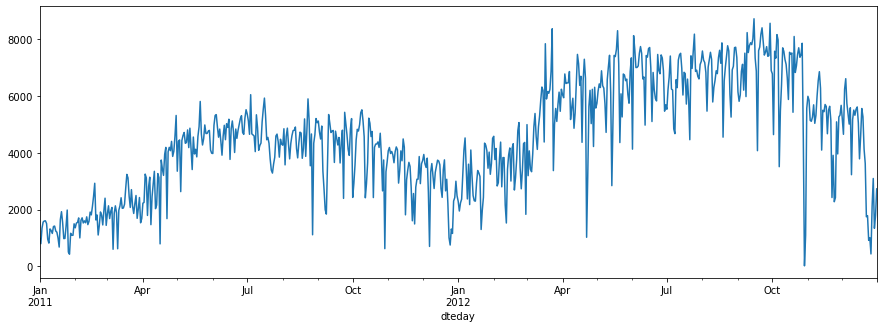

In [3]:
df['count'].plot(figsize=(15,5))
plt.show()

In [4]:
x = df[['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed']].to_numpy()
y = df['count'].to_numpy()

#### Monte Carlo Cross-Validation

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(584, 6)
(584,)
(147, 6)
(147,)


In [6]:
model = LinearRegression().fit(x_train, y_train)

fitted = model.predict(x_train)
y_hat = model.predict(x_test)

To evaluate the accuracy of our predictions, we will use the <b>mean absolute error</b> (MAE),

\begin{align*}
    \text{MAE} &= \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
\end{align*}

This metric has the advantage of being very easy to interpret.

In [7]:
from sklearn.metrics import mean_absolute_error

mae_train_lr = mean_absolute_error(y_train, fitted)
mae_test_lr = mean_absolute_error(y_test, y_hat)
print('Train MAE Linear Regression =', mae_train_lr)
print(' Test MAE Linear Regression =', mae_test_lr)

Train MAE Linear Regression = 1179.2782286003228
 Test MAE Linear Regression = 1092.5312673169885


In [8]:
n_sim = 1000

mae_train_lr = []
mae_test_lr = []
for i in range(n_sim):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    
    model = LinearRegression().fit(x_train, y_train)

    fitted = model.predict(x_train)
    y_hat = model.predict(x_test)
    
    mae_train_lr.append(mean_absolute_error(y_train, fitted))
    mae_test_lr.append(mean_absolute_error(y_test, y_hat))
    
mae_train_lr = np.array(mae_train_lr)
mae_test_lr = np.array(mae_test_lr)

In [9]:
print('Avg. Train MAE Linear Regression =', mae_train_lr.mean())
print(' Avg. Test MAE Linear Regression =', mae_test_lr.mean())
print('---')
print('Std. Train MAE Linear Regression =', mae_train_lr.std())
print(' Std. Test MAE Linear Regression =', mae_test_lr.std())

Avg. Train MAE Linear Regression = 1154.2254173966717
 Avg. Test MAE Linear Regression = 1173.2889006027322
---
Std. Train MAE Linear Regression = 16.856885254189166
 Std. Test MAE Linear Regression = 62.01433106191903


<AxesSubplot:>

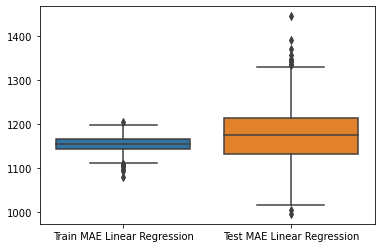

In [10]:
df_mae = pd.DataFrame()
df_mae['Train MAE Linear Regression'] = mae_train_lr
df_mae['Test MAE Linear Regression'] = mae_test_lr

sns.boxplot(data=df_mae)

Is this good?

Let's compare this to a very simple prediction method: taking the average.

In [11]:
n_sim = 1000

mae_train_mean = []
mae_test_mean = []
for i in range(n_sim):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)

    fitted = np.repeat(y_train.mean(), repeats=len(y_train))
    y_hat = np.repeat(y_train.mean(), repeats=len(y_test))
    
    mae_train_mean.append(mean_absolute_error(y_train, fitted))
    mae_test_mean.append(mean_absolute_error(y_test, y_hat))
    
mae_train_mean = np.array(mae_train_mean)
mae_test_mean = np.array(mae_test_mean)

In [12]:
print('Avg. Train MAE Mean Method =', mae_train_mean.mean())
print(' Avg. Test MAE Mean Method =', mae_test_mean.mean())
print('---')
print('Std. Train MAE Mean Method =', mae_train_mean.std())
print(' Std. Test MAE Mean Method =', mae_test_mean.std())

Avg. Train MAE Mean Method = 1581.832183852505
 Avg. Test MAE Mean Method = 1582.7421110334546
---
Std. Train MAE Mean Method = 21.10544672658609
 Std. Test MAE Mean Method = 83.9356492705848


<AxesSubplot:>

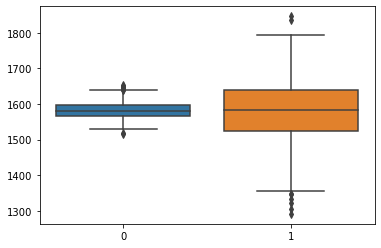

In [13]:
sns.boxplot(data=[mae_train_mean, mae_test_mean])

So far, linear regression looks like a better method than just taking the average. Can we do better though?

---

#### Example. Bike Sharing - Hyperparameter Tuning and Model Selection

Suppose we want to see if `k-NN` can beat the linear regression model.

Before fitting the model, we need to select $k$. What's the best $k$? (sounds like an optimization problem!)

We can use cross-validation to choose the optimal $k$ by iterating over candidate values for $k$. Although we could try every possible value for $k$, this is typically not possible for more complicated ML models that may have a lot of hyperparameters. Instead we will constrain our search to lie within some interval at fixed steps, this is called <b>grid search</b>.

In [14]:
k_grid = range(1, 21)
n_sim = 1000

mae_test_knn_all = []
for k in k_grid:
    
    mae_train_knn = []
    mae_test_knn = []
    
    for i in range(n_sim):

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)

        model = KNeighborsRegressor(n_neighbors=k).fit(x_train, y_train)

        fitted = model.predict(x_train)
        y_hat = model.predict(x_test)

        mae_train_knn.append(mean_absolute_error(y_train, fitted))
        mae_test_knn.append(mean_absolute_error(y_test, y_hat))

    mae_train_knn = np.array(mae_train_knn)
    mae_test_knn = np.array(mae_test_knn)
    
    print('k =', k, ' Avg. Test MAE Mean Method =', mae_test_knn.mean())
    mae_test_knn_all.append(mae_test_knn)

k = 1  Avg. Test MAE Mean Method = 1343.2476870748299
k = 2  Avg. Test MAE Mean Method = 1184.2838979591836
k = 3  Avg. Test MAE Mean Method = 1112.6859297052156
k = 4  Avg. Test MAE Mean Method = 1083.4183384353742
k = 5  Avg. Test MAE Mean Method = 1071.3893999999998
k = 6  Avg. Test MAE Mean Method = 1067.3852052154195
k = 7  Avg. Test MAE Mean Method = 1068.1683206997086
k = 8  Avg. Test MAE Mean Method = 1067.6860841836733
k = 9  Avg. Test MAE Mean Method = 1069.5679372637944
k = 10  Avg. Test MAE Mean Method = 1073.1074843537415
k = 11  Avg. Test MAE Mean Method = 1077.4369820655536
k = 12  Avg. Test MAE Mean Method = 1081.5041519274378
k = 13  Avg. Test MAE Mean Method = 1085.416420722135
k = 14  Avg. Test MAE Mean Method = 1089.7715063168125
k = 15  Avg. Test MAE Mean Method = 1094.2513183673468
k = 16  Avg. Test MAE Mean Method = 1097.4719009353742
k = 17  Avg. Test MAE Mean Method = 1099.7984013605444
k = 18  Avg. Test MAE Mean Method = 1101.5863715041573
k = 19  Avg. Test MA

<AxesSubplot:>

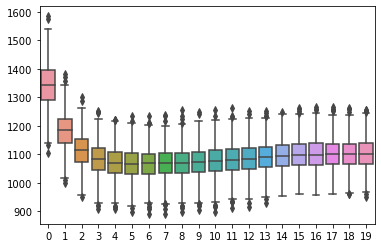

In [15]:
sns.boxplot(data=mae_test_knn_all)

Since $k=6$ gives us the lowest MAE, that's what we'll set it to.

In [16]:
n_sim = 1000

mae_train_knn = []
mae_test_knn = []
for i in range(n_sim):

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)

    model = KNeighborsRegressor(n_neighbors=6).fit(x_train, y_train)

    fitted = model.predict(x_train)
    y_hat = model.predict(x_test)

    mae_train_knn.append(mean_absolute_error(y_train, fitted))
    mae_test_knn.append(mean_absolute_error(y_test, y_hat))

mae_train_knn = np.array(mae_train_knn)
mae_test_knn = np.array(mae_test_knn)

In [17]:
print('Avg. Train MAE k-NN (k=6) =', mae_train_knn.mean())
print(' Avg. Test MAE k-NN (k=6) =', mae_test_knn.mean())
print('---')
print('Std. Train MAE k-NN (k=6) =', mae_train_knn.std())
print(' Std. Test MAE k-NN (k=6) =', mae_test_knn.std())

Avg. Train MAE k-NN (k=6) = 894.8315650684931
 Avg. Test MAE k-NN (k=6) = 1067.3852052154195
---
Std. Train MAE k-NN (k=6) = 16.045479486581506
 Std. Test MAE k-NN (k=6) = 54.069435726754115


<AxesSubplot:>

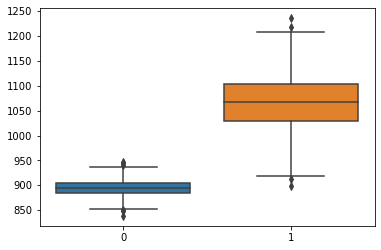

In [18]:
sns.boxplot(data=[mae_train_knn, mae_test_knn])

---

#### Example. Leave-One-Out Cross-Validation

In [23]:
from sklearn.model_selection import LeaveOneOut

k_grid = range(1, 21)
loocv = LeaveOneOut()

mae_test_knn_all = []
for k in k_grid:
    
    mae_train_knn = []
    mae_test_knn = []
    
    for train_index, test_index in loocv.split(x):

        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        model = KNeighborsRegressor(n_neighbors=k).fit(x_train, y_train)

        fitted = model.predict(x_train)
        y_hat = model.predict(x_test)

        mae_train_knn.append(mean_absolute_error(y_train, fitted))
        mae_test_knn.append(mean_absolute_error(y_test, y_hat))

    mae_train_knn = np.array(mae_train_knn)
    mae_test_knn = np.array(mae_test_knn)
    
    print('k =', k, ' Avg. Test MAE Mean Method =', mae_test_knn.mean())
    mae_test_knn_all.append(mae_test_knn)

k = 1  Avg. Test MAE Mean Method = 1343.749658002736
k = 2  Avg. Test MAE Mean Method = 1193.655950752394
k = 3  Avg. Test MAE Mean Method = 1115.8207934336526
k = 4  Avg. Test MAE Mean Method = 1073.016415868673
k = 5  Avg. Test MAE Mean Method = 1059.2355677154583
k = 6  Avg. Test MAE Mean Method = 1050.548335613315
k = 7  Avg. Test MAE Mean Method = 1053.313269493844
k = 8  Avg. Test MAE Mean Method = 1058.6285909712722
k = 9  Avg. Test MAE Mean Method = 1055.6963064295485
k = 10  Avg. Test MAE Mean Method = 1053.6061559507523
k = 11  Avg. Test MAE Mean Method = 1054.8256435766696
k = 12  Avg. Test MAE Mean Method = 1061.9188326493388
k = 13  Avg. Test MAE Mean Method = 1065.0811322740187
k = 14  Avg. Test MAE Mean Method = 1069.9983388704318
k = 15  Avg. Test MAE Mean Method = 1071.406292749658
k = 16  Avg. Test MAE Mean Method = 1076.359182626539
k = 17  Avg. Test MAE Mean Method = 1083.7050776534966
k = 18  Avg. Test MAE Mean Method = 1083.7865177078584
k = 19  Avg. Test MAE Mean

<AxesSubplot:>

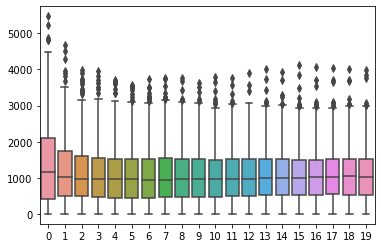

In [24]:
sns.boxplot(data=mae_test_knn_all)

---

#### Example. k-Fold Cross-Validation

In [28]:
from sklearn.model_selection import KFold

k_grid = range(1, 21)
kf = KFold(n_splits=10, random_state=1, shuffle=True)

mae_test_knn_all = []
for k in k_grid:
    
    mae_train_knn = []
    mae_test_knn = []
    
    for train_index, test_index in kf.split(x):

        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        model = KNeighborsRegressor(n_neighbors=k).fit(x_train, y_train)

        fitted = model.predict(x_train)
        y_hat = model.predict(x_test)

        mae_train_knn.append(mean_absolute_error(y_train, fitted))
        mae_test_knn.append(mean_absolute_error(y_test, y_hat))

    mae_train_knn = np.array(mae_train_knn)
    mae_test_knn = np.array(mae_test_knn)
    
    print('k =', k, ' Avg. Test MAE Mean Method =', mae_test_knn.mean())
    mae_test_knn_all.append(mae_test_knn)

k = 1  Avg. Test MAE Mean Method = 1351.8579229914844
k = 2  Avg. Test MAE Mean Method = 1189.7839318770825
k = 3  Avg. Test MAE Mean Method = 1102.8785388127853
k = 4  Avg. Test MAE Mean Method = 1075.307617549056
k = 5  Avg. Test MAE Mean Method = 1069.3184968530175
k = 6  Avg. Test MAE Mean Method = 1061.3621837591018
k = 7  Avg. Test MAE Mean Method = 1055.5225895171102
k = 8  Avg. Test MAE Mean Method = 1061.1319719548314
k = 9  Avg. Test MAE Mean Method = 1058.2533958616148
k = 10  Avg. Test MAE Mean Method = 1055.8363013698631
k = 11  Avg. Test MAE Mean Method = 1057.486991350005
k = 12  Avg. Test MAE Mean Method = 1063.9142570652846
k = 13  Avg. Test MAE Mean Method = 1065.7708569475692
k = 14  Avg. Test MAE Mean Method = 1068.944659385413
k = 15  Avg. Test MAE Mean Method = 1072.6998296927065
k = 16  Avg. Test MAE Mean Method = 1074.3874062847094
k = 17  Avg. Test MAE Mean Method = 1076.9791373565345
k = 18  Avg. Test MAE Mean Method = 1084.876371919865
k = 19  Avg. Test MAE M

---

#### Example. Grid Search and Repeated k-Fold with `sklearn`

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

param_grid = {'n_neighbors': range(1, 21)}

cv = RepeatedKFold(n_splits=10, n_repeats=100, random_state=1)

search = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid, scoring='neg_mean_absolute_error', cv=cv)
search.fit(x, y)

GridSearchCV(cv=RepeatedKFold(n_repeats=100, n_splits=10, random_state=1),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 21)},
             scoring='neg_mean_absolute_error')

In [36]:
results_df = pd.DataFrame(search.cv_results_)
results_df = results_df.sort_values(by=['rank_test_score'])
results_df = (
    results_df
    .set_index(results_df["params"].apply(
        lambda x: "_".join(str(val) for val in x.values()))
    )
    .rename_axis('n_neighbors')
)
results_df[
    ['params', 'rank_test_score', 'mean_test_score', 'std_test_score']
]

,params,rank_test_score,mean_test_score,std_test_score
n_neighbors,,,,
6,{'n_neighbors': 6},1,-1060.360158,83.178170
9,{'n_neighbors': 9},2,-1061.175276,79.410859
8,{'n_neighbors': 8},3,-1062.564910,81.366958
7,{'n_neighbors': 7},4,-1062.771278,81.633977
10,{'n_neighbors': 10},5,-1063.193423,79.025828
5,{'n_neighbors': 5},6,-1066.579953,84.365036
11,{'n_neighbors': 11},7,-1066.692697,78.183029
12,{'n_neighbors': 12},8,-1071.422097,77.608919
13,{'n_neighbors': 13},9,-1074.909559,77.183736


Is the 1st rank model significantly better than the second rank? See [`here`](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html#) for an example on statistical tests on ranked scores!